# Titanic: Machine Learning from Disaster
## Start here! Predict survival on the Titanic and get familiar with ML basics

## Data owned by Kaggle
## Guideline By Jonathan Edwin

### ---------------------------------------------------------------------------------------------------------------------------

## Data Dictionary 
### survival:	Survival	0 = No, 1 = Yes
### pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
### sex:	Sex	
### Age:	Age in years	
### fare:  	 Passenger fare	
### cabin: 	Cabin number	
### embarked:  	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### ---------------------------------------------------------------------------------------------------------------------------

## Variable Notes
### pclass: A proxy for socio-economic status (SES)
#### 1st = Upper     2nd = Middle     3rd = Lower

### age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

### ---------------------------------------------------------------------------------------------------------------------------
## P.S. The data had being edited from the original due to Ristek Open Class purposes
### ---------------------------------------------------------------------------------------------------------------------------

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

## Read CSV Files
### If you have column that you want to use as index, use index_col

In [2]:
train = pd.read_csv('train.csv', index_col= 0)

In [3]:
test = pd.read_csv('test.csv', index_col = 0)

In [4]:
ss = pd.read_csv('sample_submission.csv', index_col = 0)

## Explore the data
### Try to look your train and test data by head, tail, info, describe, columns
### You also can find distinct values too

In [5]:
train.head(2)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,NaN,S
2,1,1,female,38.0,71.2833,C85,C


In [6]:
train.tail(2)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
PassengerId,,,,,,,
890,1,1,male,26.0,30.00,C148,C
891,0,3,male,32.0,7.75,NaN,Q


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 55.7+ KB


In [8]:
train.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [9]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
train.Survived.nunique()

2

## Handle Missing Value

### Categorical or Discrete Data:
##### 1. Ignore the row that has missing value, or it's possible to ignore the column if there are more than 50% nan value in the column
##### 2. Treat missing data as another category
##### 3. Replace by most frequent value
##### 4. Develop model to predict missing value

### Numerical Data or Continuous:
##### 1.Ignore the row that has missing value, or it's possible to ignore the column if there are more than 50% nan value in the column
##### 2. Replace with mean of column or median of column(if there are many outliers)
##### 3. Replace with certain value such as -9999(In this case we still try to treat them as missing value)
##### 4. Build model to predict missing value


### We find that feature 'Age' and 'Cabin' has some data that is missing
### There are some options to handle missing value, but let's try to handle it:
### - Feature 'Age', we will fill missing value with median 
### - Feature 'Cabin', we will drop the column
### Don't forget also to change both datasets (train and test)

### after you handle it, try to see your data

In [12]:
train['Age'] = train['Age'].fillna(train['Age'].median())

In [13]:
train = train.drop('Cabin', 1)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 48.7+ KB


In [15]:
test['Age'] = test['Age'].fillna(train['Age'].median())

In [16]:
test = test.drop('Cabin', 1)

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 5 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 19.6+ KB


## Visualise Data
### You can use Matplotlib or Seaborn

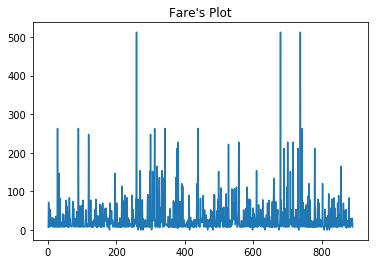

In [18]:
plt.plot(train['Fare'])
plt.title("Fare's Plot")
plt.show()

Text(0.5,1,'Barplot Survived')

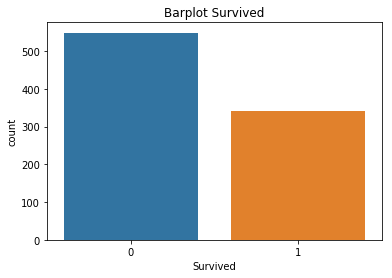

In [19]:
sns.countplot('Survived', data = train).set_title('Barplot Survived')

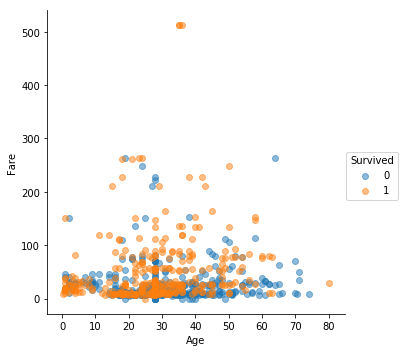

In [20]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

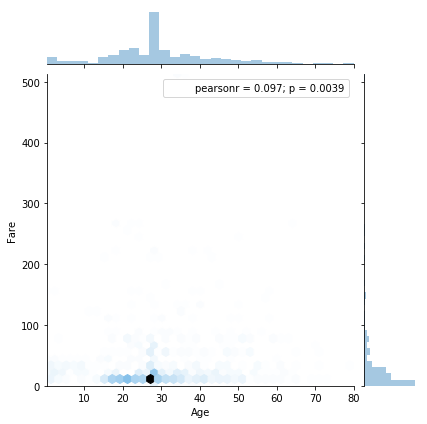

In [21]:
sns.jointplot("Age", "Fare", data=train, kind="hex")

## Handle String Categorical Data
### In our case, we have 2 features that is String Categorical
### Feature 'Sex' and 'Embarked'

### - Feature 'Embarked' with Ordinal Encoding

In [22]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [24]:
mapper = {'S': 0, 'C': 1, 'Q': 2}

In [25]:
train['Embarked'].replace(mapper, inplace = True)
test['Embarked'].replace(mapper, inplace = True)

In [26]:
train.Embarked.value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

### - Feature 'Sex', with One Hot Encoding

In [27]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
train_Sex_dummies = pd.get_dummies(train['Sex'], prefix = 'Sex')

In [29]:
test_Sex_dummies = pd.get_dummies(test['Sex'], prefix = 'Sex')

In [30]:
train_Sex_dummies.head()

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### For Official Only

#### To make It easier to be understand by participant PLEASE show this down

In [31]:
train_Sex_dummies['Sex'] = train['Sex']

In [32]:
train_Sex_dummies.head()

,Sex_female,Sex_male,Sex
PassengerId,,,
1,0,1,male
2,1,0,female
3,1,0,female
4,1,0,female
5,0,1,male


### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [33]:
train['Sex_male'] = train_Sex_dummies['Sex_male']
test['Sex_male'] = test_Sex_dummies['Sex_male']

In [34]:
train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Sex_male
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,0,1
2,1,1,female,38.0,71.2833,1,0


In [35]:
train.drop('Sex', 1, inplace= True)
test.drop('Sex', 1, inplace = True)

In [36]:
train.head(1)

,Survived,Pclass,Age,Fare,Embarked,Sex_male
PassengerId,,,,,,
1,0,3,22.0,7.25,0,1


## Split your training data into y consists of 'Survived' Column  and X for others

In [37]:
y = train['Survived']

In [38]:
X = train.drop('Survived', 1)

## Machine Learning
### Using Decision Tree Classifier

In [39]:
dt = DecisionTreeClassifier()

In [40]:
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
ss['Survived'] = dt.predict(test)

In [42]:
ss.head()

,Survived
PassengerId,
892,0
893,0
894,1
895,1
896,1


## Export your Dataframe to csv

In [43]:
ss.to_csv('hasil.csv', index = True)